# Importing CSV File

In [38]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
df=pd.read_csv("C://Users//Dell//Downloads//USvideos.csv")

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [41]:
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [42]:
# Handle missing values
df = df.dropna()

In [43]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40379.000000,4.037900e+04,4.037900e+04,4.037900e+04,4.037900e+04
mean,19.944253,2.370839e+06,7.461677e+04,3.508122e+03,8.287396e+03
std,7.594850,7.428515e+06,2.296172e+05,2.317486e+04,3.431605e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.470760e+05,5.621500e+03,2.050000e+02,6.230000e+02
50%,24.000000,6.895970e+05,1.837100e+04,6.370000e+02,1.874000e+03
75%,25.000000,1.834912e+06,5.567200e+04,1.948000e+03,5.787000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.643059e+06,1.228655e+06


# visualizations to understand the distribution

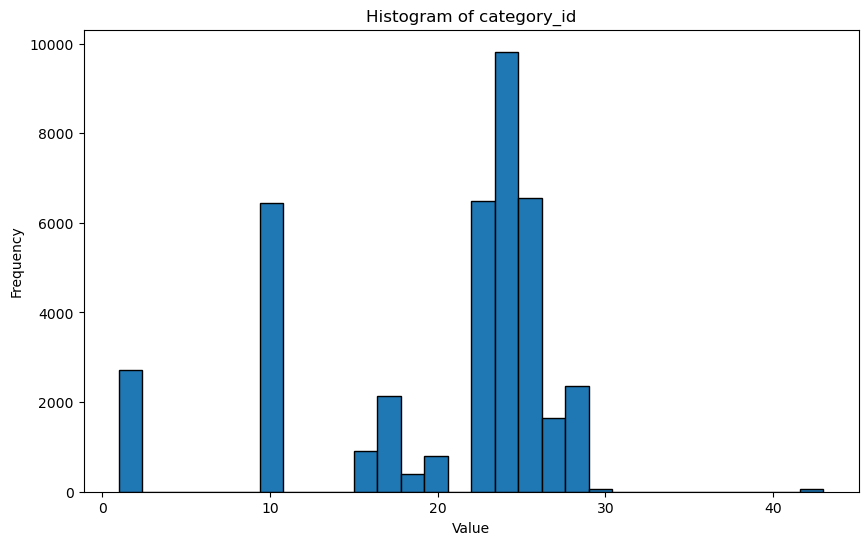

In [44]:
plt.figure(figsize=(10, 6))
plt.hist(df['category_id'], bins=30, edgecolor='k')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of category_id')
plt.show()

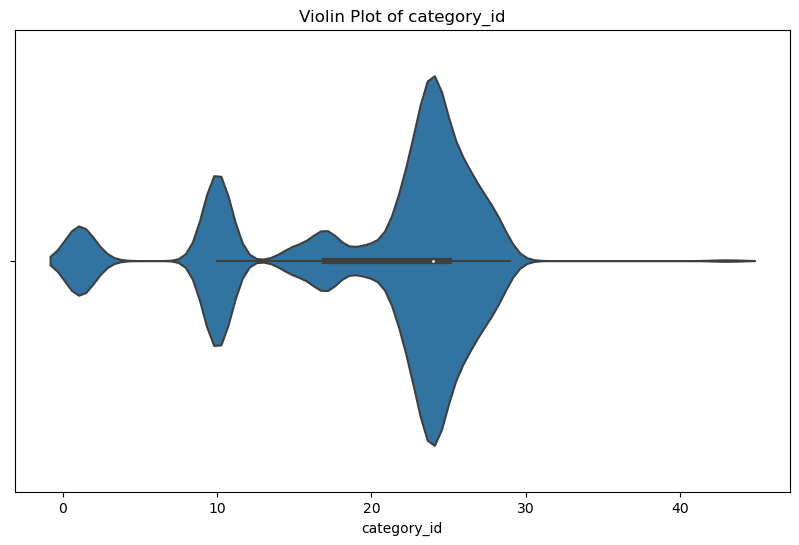

In [45]:
# Violin plot for a specific column
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['category_id'])
plt.title('Violin Plot of category_id')
plt.show()

In [46]:
df.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.168860,-0.174073,-0.047387,-0.086625,0.047459,-0.013313,-0.030583
views,-0.168860,1.000000,0.848746,0.558108,0.655819,0.004339,0.015304,-0.001708
likes,-0.174073,0.848746,1.000000,0.514691,0.853380,-0.028071,-0.021068,-0.002106
dislikes,-0.047387,0.558108,0.514691,1.000000,0.623131,-0.003755,-0.009814,-0.001899
comment_count,-0.086625,0.655819,0.853380,0.623131,1.000000,-0.029760,-0.014878,-0.003642
comments_disabled,0.047459,0.004339,-0.028071,-0.003755,-0.029760,1.000000,0.326998,-0.002811
ratings_disabled,-0.013313,0.015304,-0.021068,-0.009814,-0.014878,0.326998,1.000000,-0.001479
video_error_or_removed,-0.030583,-0.001708,-0.002106,-0.001899,-0.003642,-0.002811,-0.001479,1.000000


In [47]:
correlation = df.corr()

In [48]:
correlation['views'].sort_values(ascending=False)

views                     1.000000
likes                     0.848746
comment_count             0.655819
dislikes                  0.558108
ratings_disabled          0.015304
comments_disabled         0.004339
video_error_or_removed   -0.001708
category_id              -0.168860
Name: views, dtype: float64

# Box plots for outlier detection

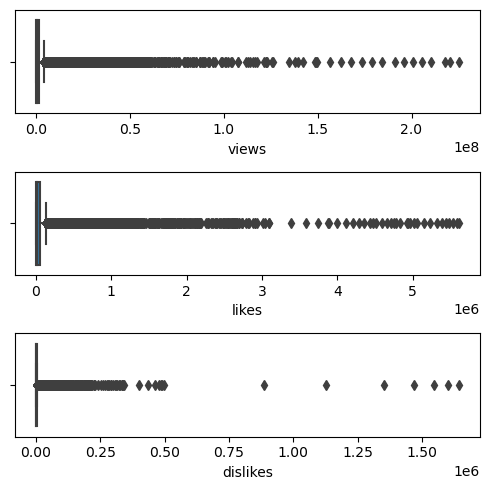

In [49]:
fig,axs =plt.subplots(3,figsize=(5,5))
plt1 = sns.boxplot(df['views'],ax=axs[0])
plt2 = sns.boxplot(df['likes'],ax=axs[1])
plt3 = sns.boxplot(df['dislikes'],ax=axs[2])
plt.tight_layout()

import warnings
warnings.filterwarnings('ignore')

# Correlation Heatmap:

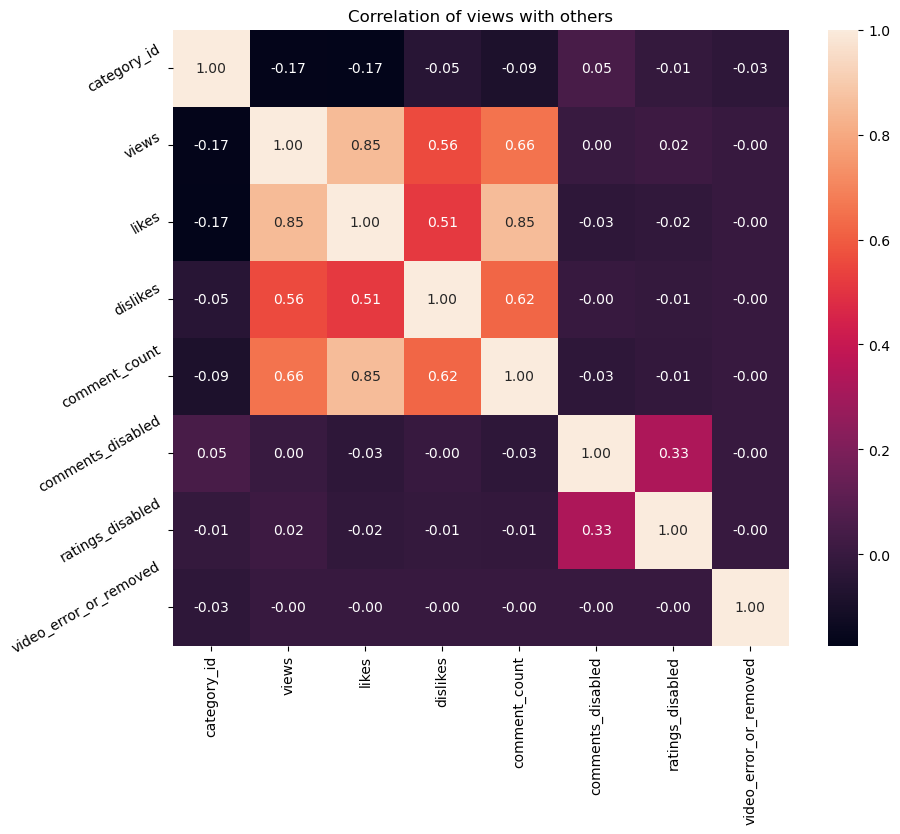

In [50]:
#Correlation Heatmap:
plt.figure(figsize=(10,8))
a= sns.heatmap(correlation,square=True,annot=True,fmt='.2f',linecolor='white')
a.set_xticklabels(a.get_xticklabels(),rotation=90)
a.set_yticklabels(a.get_yticklabels(),rotation=30)
plt.title('Correlation of views with others')
plt.show()